In [1]:
# Loading the necessary packages

# Packages that are required for basic computation
import numpy as np
import pandas as pd

# Packages for graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) #adds a nice background to the graphs
sns.set() #setting the default seaborn style for our plots

# Packages for statistics
import scipy.stats as stats

# Packages to ignore warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
mydata = pd.read_csv('Wholesale Customer.csv')

In [3]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
mydata.tail()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,436,Hotel,Other,29703,12051,16027,13135,182,2204
436,437,Hotel,Other,39228,1431,764,4510,93,2346
437,438,Retail,Other,14531,15488,30243,437,14841,1867
438,439,Hotel,Other,10290,1981,2232,1038,168,2125
439,440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
mydata.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [8]:
mydata.columns

Index(['Buyer/Spender', 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery',
       'Frozen', 'Detergents_Paper', 'Delicatessen'],
      dtype='object')

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [15]:
mydata.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440,NaN,NaN,NaN,220.5,127.161,1,110.75,220.5,330.25,440
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


In [3]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Region
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
mydata['Region'].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [7]:
Product_Sum_Lisbon = 0

for i in range(0,6):
    Product_Sum_Lisbon = Product_Sum_Lisbon + mydata[mydata['Region'] == 'Lisbon'][Products[i]].sum()

In [8]:
Product_Sum_Lisbon

2386813

In [9]:
Product_Sum_Oporto = 0

for i in range(0,6):
    Product_Sum_Oporto = Product_Sum_Oporto + mydata[mydata['Region'] == 'Oporto'][Products[i]].sum()

In [10]:
Product_Sum_Oporto

1555088

In [11]:
Product_Sum_Other = 0

for i in range(0,6):
    Product_Sum_Other = Product_Sum_Other + mydata[mydata['Region'] == 'Other'][Products[i]].sum()

In [12]:
Product_Sum_Other

10677599

In [21]:
df_1 = {'Region':['Other', 'Lisbon', 'Oporto'],
        'Amount Spent':[Product_Sum_Lisbon,Product_Sum_Oporto,Product_Sum_Other]}
  
Region_Sum = pd.DataFrame(df_1)

Region_Sum

,Region,Amount Spent
0,Other,2386813
1,Lisbon,1555088
2,Oporto,10677599


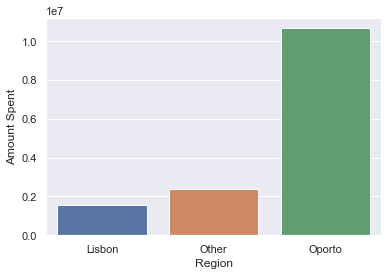

In [22]:
sns.barplot(Region_Sum['Region'], Region_Sum['Amount Spent'], order=Region_Sum.sort_values('Amount Spent').Region);

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Channel
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
mydata['Channel'].unique()

array(['Retail', 'Hotel'], dtype=object)

In [24]:
Product_Sum_Retail = 0

for i in range(0,6):
    Product_Sum_Retail = Product_Sum_Retail + mydata[mydata['Channel'] == 'Retail'][Products[i]].sum()

In [25]:
Product_Sum_Retail

6619931

In [26]:
Product_Sum_Hotel = 0

for i in range(0,6):
    Product_Sum_Hotel = Product_Sum_Hotel + mydata[mydata['Channel'] == 'Hotel'][Products[i]].sum()

In [27]:
Product_Sum_Hotel

7999569

In [28]:
df_2 = {'Channel':['Retail', 'Hotel'],
        'Amount Spent':[Product_Sum_Retail, Product_Sum_Hotel]}
  
Channel_Sum = pd.DataFrame(df_2)

Channel_Sum

,Channel,Amount Spent
0,Retail,6619931
1,Hotel,7999569


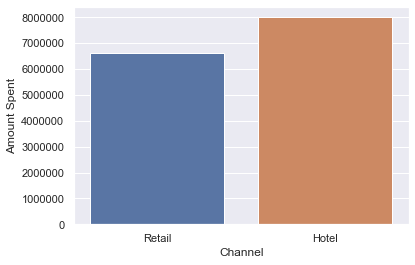

In [29]:
sns.barplot(Channel_Sum['Channel'], Channel_Sum['Amount Spent'], order=Channel_Sum.sort_values('Amount Spent').Channel);

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Region
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [31]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Lisbon_item = {}

for i in range(0,6):
    Lisbon_item[Products[i]] = mydata[mydata['Region'] == 'Lisbon'][Products[i]].sum()

In [32]:
Lisbon_item

{'Fresh': 854833,
 'Milk': 422454,
 'Grocery': 570037,
 'Frozen': 231026,
 'Detergents_Paper': 204136,
 'Delicatessen': 104327}

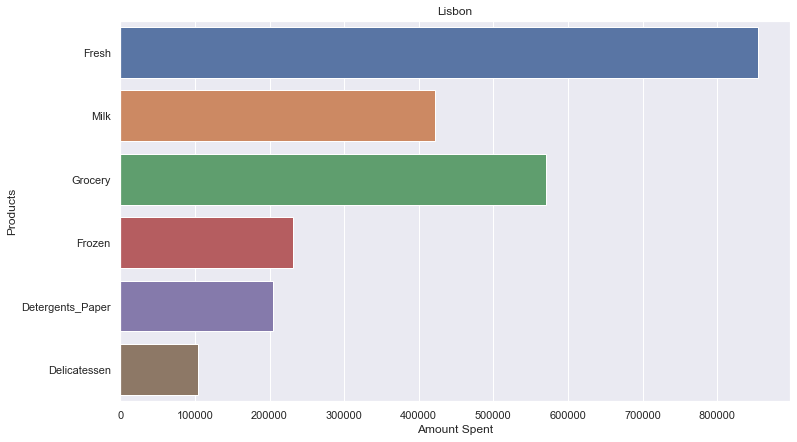

In [33]:
plt.figure(figsize=(12,7))
names_1 = list(Lisbon_item.keys())
values_1 = list(Lisbon_item.values())
sns.barplot(values_1, names_1);
plt.title("Lisbon");
plt.xlabel("Amount Spent");
plt.ylabel("Products");

In [34]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Other_item = {}

for i in range(0,6):
    Other_item[Products[i]] = mydata[mydata['Region'] == 'Other'][Products[i]].sum()

In [35]:
Other_item

{'Fresh': 3960577,
 'Milk': 1888759,
 'Grocery': 2495251,
 'Frozen': 930492,
 'Detergents_Paper': 890410,
 'Delicatessen': 512110}

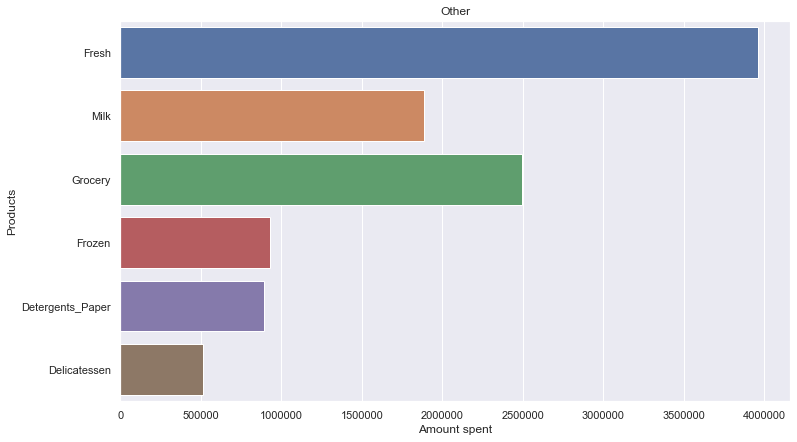

In [36]:
plt.figure(figsize=(12,7))
names_2 = list(Other_item.keys())
values_2 = list(Other_item.values())
sns.barplot(values_2, names_2);
plt.title("Other");
plt.xlabel("Amount spent");
plt.ylabel("Products");

In [37]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Oporto_item = {}

for i in range(0,6):
    Oporto_item[Products[i]] = mydata[mydata['Region'] == 'Oporto'][Products[i]].sum()

In [38]:
Oporto_item

{'Fresh': 464721,
 'Milk': 239144,
 'Grocery': 433274,
 'Frozen': 190132,
 'Detergents_Paper': 173311,
 'Delicatessen': 54506}

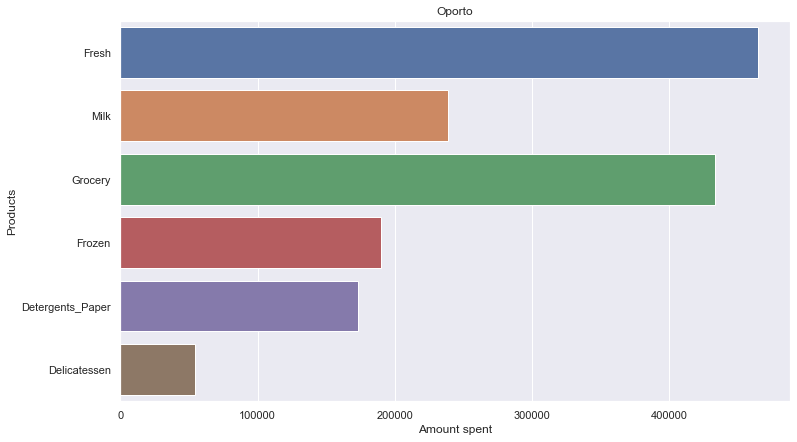

In [39]:
plt.figure(figsize=(12,7))
names_3 = list(Oporto_item.keys())
values_3 = list(Oporto_item.values())
sns.barplot(values_3, names_3);
plt.title("Oporto");
plt.xlabel("Amount spent");
plt.ylabel("Products");

In [46]:
region_group = mydata.groupby('Region')

In [47]:
region_group.describe().T

Region                        Lisbon        Oporto          Other
Buyer/Spender    count     77.000000     47.000000     316.000000
                 mean     235.000000    317.000000     202.613924
                 std       22.371857     13.711309     143.615303
                 min      197.000000    294.000000       1.000000
                 25%      216.000000    305.500000      79.750000
                 50%      235.000000    317.000000     158.500000
                 75%      254.000000    328.500000     361.250000
                 max      273.000000    340.000000     440.000000
Fresh            count     77.000000     47.000000     316.000000
                 mean   11101.727273   9887.680851   12533.471519
                 std    11557.438575   8387.899211   13389.213115
                 min       18.000000      3.000000       3.000000
                 25%     2806.000000   2751.500000    3350.750000
                 50%     7363.000000   8090.000000    8752.500000
                 75%    15218.000000  14925.500000   17406.500000
                 max    56083.000000  32717.000000  112151.000000
Milk             count     77.000000     47.000000     316.000000
                 mean    5486.415584   5088.170213    5977.085443
                 std     5704.856079   5826.343145    7935.463443
                 min      258.000000    333.000000      55.000000
                 25%     1372.000000   1430.500000    1634.000000
                 50%     3748.000000   2374.000000    3684.500000
                 75%     7503.000000   5772.500000    7198.750000
                 max    28326.000000  25071.000000   73498.000000
Grocery          count     77.000000     47.000000     316.000000
                 mean    7403.077922   9218.595745    7896.363924
                 std     8496.287728  10842.745314    9537.287778
                 min      489.000000   1330.000000       3.000000
                 25%     2046.000000   2792.500000    2141.500000
                 50%     3838.000000   6114.000000    4732.000000
                 75%     9490.000000  11758.500000   10559.750000
                 max    39694.000000  67298.000000   92780.000000
Frozen           count     77.000000     47.000000     316.000000
                 mean    3000.337662   4045.361702    2944.594937
                 std     3092.143894   9151.784954    4260.126243
                 min       61.000000    131.000000      25.000000
                 25%      950.000000    811.500000     664.750000
                 50%     1801.000000   1455.000000    1498.000000
                 75%     4324.000000   3272.000000    3354.750000
                 max    18711.000000  60869.000000   36534.000000
Detergents_Paper count     77.000000     47.000000     316.000000
                 mean    2651.116883   3687.468085    2817.753165
                 std     4208.462708   6514.717668    4593.051613
                 min        5.000000     15.000000       3.000000
                 25%      284.000000    282.500000     251.250000
                 50%      737.000000    811.000000     856.000000
                 75%     3593.000000   4324.500000    3875.750000
                 max    19410.000000  38102.000000   40827.000000
Delicatessen     count     77.000000     47.000000     316.000000
                 mean    1354.896104   1159.702128    1620.601266
                 std     1345.423340   1050.739841    3232.581660
                 min        7.000000     51.000000       3.000000
                 25%      548.000000    540.500000     402.000000
                 50%      806.000000    898.000000     994.000000
                 75%     1775.000000   1538.500000    1832.750000
                 max     6854.000000   5609.000000   47943.000000

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Channel
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [40]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Hotel_item = {}

for i in range(0,6):
    Hotel_item[Products[i]] = mydata[mydata['Channel'] == 'Hotel'][Products[i]].sum()

In [41]:
Hotel_item

{'Fresh': 4015717,
 'Milk': 1028614,
 'Grocery': 1180717,
 'Frozen': 1116979,
 'Detergents_Paper': 235587,
 'Delicatessen': 421955}

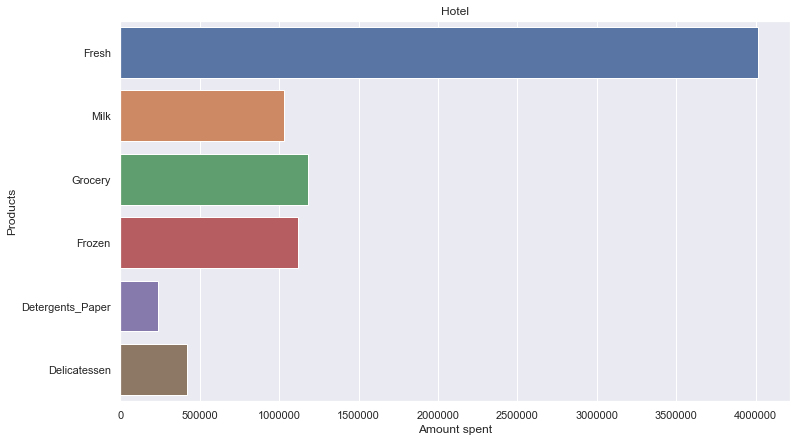

In [42]:
plt.figure(figsize=(12,7))
names_4 = list(Hotel_item.keys())
values_4 = list(Hotel_item.values())
sns.barplot(values_4, names_4);
plt.title("Hotel");
plt.xlabel("Amount spent");
plt.ylabel("Products");

In [43]:
Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
Retail_item = {}

for i in range(0,6):
    Retail_item[Products[i]] = mydata[mydata['Channel'] == 'Retail'][Products[i]].sum()

In [44]:
Retail_item

{'Fresh': 1264414,
 'Milk': 1521743,
 'Grocery': 2317845,
 'Frozen': 234671,
 'Detergents_Paper': 1032270,
 'Delicatessen': 248988}

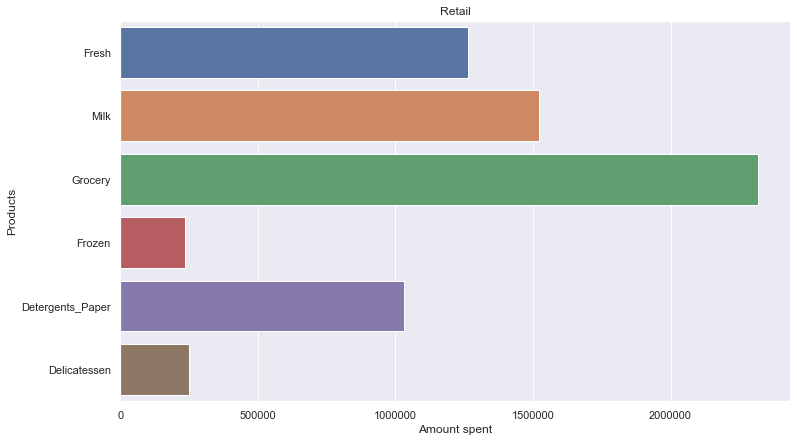

In [45]:
plt.figure(figsize=(12,7))
names_5 = list(Retail_item.keys())
values_5 = list(Retail_item.values())
sns.barplot(values_5, names_5);
plt.title("Retail");
plt.xlabel("Amount spent");
plt.ylabel("Products");

In [48]:
channel_group = mydata.groupby('Channel')

In [49]:
channel_group.describe().T

Channel                         Hotel        Retail
Buyer/Spender    count     298.000000    142.000000
                 mean      238.369128    183.000000
                 std       120.910343    132.136132
                 min         4.000000      1.000000
                 25%       137.250000     61.250000
                 50%       241.500000    166.500000
                 75%       344.500000    303.750000
                 max       440.000000    438.000000
Fresh            count     298.000000    142.000000
                 mean    13475.560403   8904.323944
                 std     13831.687502   8987.714750
                 min         3.000000     18.000000
                 25%      4070.250000   2347.750000
                 50%      9581.500000   5993.500000
                 75%     18274.750000  12229.750000
                 max    112151.000000  44466.000000
Milk             count     298.000000    142.000000
                 mean     3451.724832  10716.500000
                 std      4352.165571   9679.631351
                 min        55.000000    928.000000
                 25%      1164.500000   5938.000000
                 50%      2157.000000   7812.000000
                 75%      4029.500000  12162.750000
                 max     43950.000000  73498.000000
Grocery          count     298.000000    142.000000
                 mean     3962.137584  16322.852113
                 std      3545.513391  12267.318094
                 min         3.000000   2743.000000
                 25%      1703.750000   9245.250000
                 50%      2684.000000  12390.000000
                 75%      5076.750000  20183.500000
                 max     21042.000000  92780.000000
Frozen           count     298.000000    142.000000
                 mean     3748.251678   1652.612676
                 std      5643.912500   1812.803662
                 min        25.000000     33.000000
                 25%       830.000000    534.250000
                 50%      2057.500000   1081.000000
                 75%      4558.750000   2146.750000
                 max     60869.000000  11559.000000
Detergents_Paper count     298.000000    142.000000
                 mean      790.560403   7269.507042
                 std      1104.093673   6291.089697
                 min         3.000000    332.000000
                 25%       183.250000   3683.500000
                 50%       385.500000   5614.500000
                 75%       899.500000   8662.500000
                 max      6907.000000  40827.000000
Delicatessen     count     298.000000    142.000000
                 mean     1415.956376   1753.436620
                 std      3147.426922   1953.797047
                 min         3.000000      3.000000
                 25%       379.000000    566.750000
                 50%       821.000000   1350.000000
                 75%      1548.000000   2156.000000
                 max     47943.000000  16523.000000

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [50]:
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
Standard_deviation = {}

for i in range(0,6):
     Standard_deviation[Products[i]] = mydata[Products[i]].std()

Standard_deviation

{'Fresh': 12647.328865076894,
 'Milk': 7380.377174570843,
 'Grocery': 9503.162828994346,
 'Frozen': 4854.673332592367,
 'Detergents_Paper': 4767.8544479042,
 'Delicatessen': 2820.1059373693975}

In [17]:
Mean = {}

for i in range(0,6):
     Mean[Products[i]] = mydata[Products[i]].mean()

Mean

{'Fresh': 12000.297727272728,
 'Milk': 5796.265909090909,
 'Grocery': 7951.277272727273,
 'Frozen': 3071.931818181818,
 'Detergents_Paper': 2881.4931818181817,
 'Delicatessen': 1524.8704545454545}

In [18]:
CV = {}

for i in range(0,6):
     CV[Products[i]] = Standard_deviation[Products[i]] / Mean[Products[i]]

CV

{'Fresh': 1.0539179237473149,
 'Milk': 1.2732985840065414,
 'Grocery': 1.1951743730016824,
 'Frozen': 1.5803323836352914,
 'Detergents_Paper': 1.6546471385005155,
 'Delicatessen': 1.8494068981158382}

In [20]:
#Measure Of Variablility - MOV

MOV = pd.DataFrame(data = [mydata.std(),mydata.mean()], index = ['Standard deviation', 'Mean'])

In [21]:
MOV.drop('Buyer/Spender', axis=1,inplace = True) 

In [22]:
MOV

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Standard deviation,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


In [23]:
MOV.loc['Coefficient of variation'] = [1.0539179237473149, 1.2732985840065414, 1.1951743730016824, 1.5803323836352914, 1.6546471385005155, 1.8494068981158382] 

In [24]:
MOV

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Standard deviation,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
Mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
Coefficient of variation,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


In [19]:
#to view the sorted CV 

sort_CV = sorted(CV.items(), key=lambda x:x[1])
sorted_CV = dict(sort_CV )
sorted_CV

{'Fresh': 1.0539179237473149,
 'Grocery': 1.1951743730016824,
 'Milk': 1.2732985840065414,
 'Frozen': 1.5803323836352914,
 'Detergents_Paper': 1.6546471385005155,
 'Delicatessen': 1.8494068981158382}

### 1.4 Are there any outliers in the data? Backup your answer with a suitable plot/technique with the help of detailed comments.

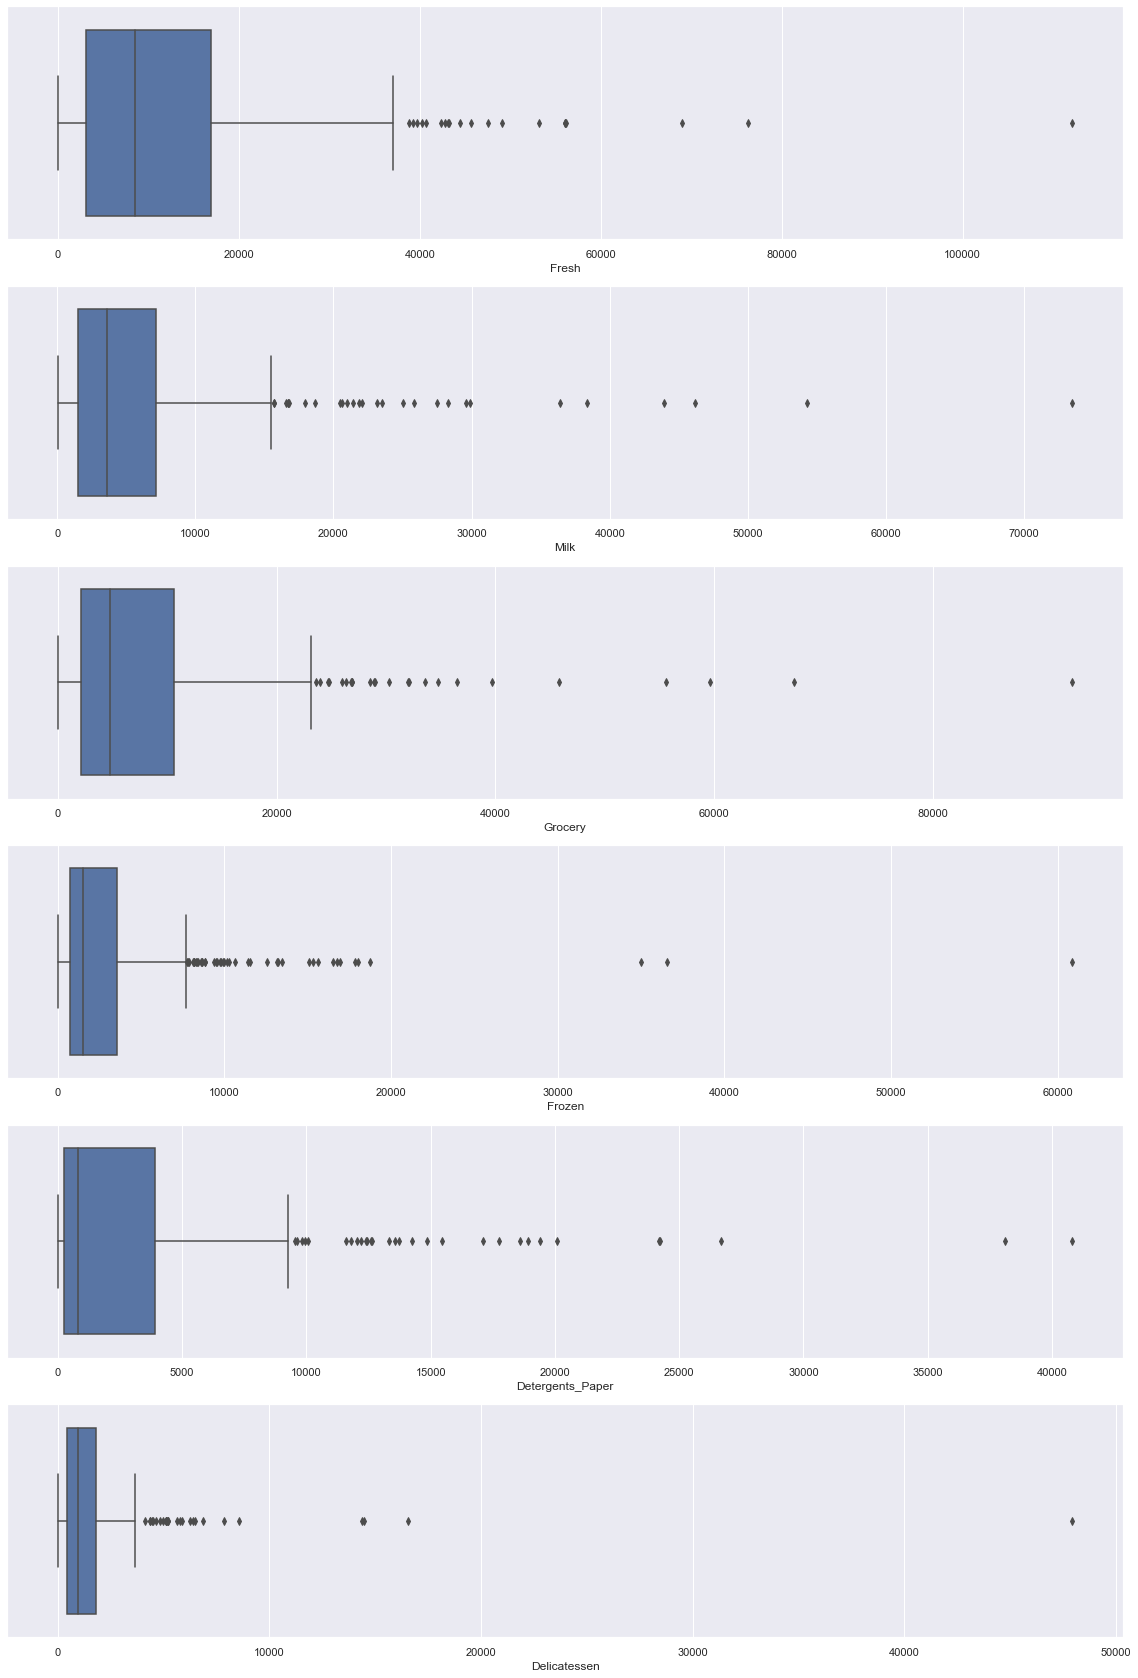

In [60]:
plt.figure(figsize=(20,30))

Products = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
for i in range(0,6):
    plt.subplot(6,1,i+1)
    sns.boxplot(mydata[Products[i]])

In [61]:
# Measure the skeweness of the required columns

Skewness = pd.DataFrame({'Skewness' : [stats.skew(mydata.Fresh),stats.skew(mydata.Milk),stats.skew(mydata.Grocery),
                                    stats.skew(mydata.Frozen),stats.skew(mydata.Detergents_Paper),stats.skew(mydata.Delicatessen)]},
                        index=['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen'])  
Skewness

,Skewness
Fresh,2.552583
Milk,4.039922
Grocery,3.575187
Frozen,5.887826
Detergents_Paper,3.619458
Delicatessen,11.113534
